# Finding How The Data Is Distributed

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data to data Frame

In [33]:
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# View the First Few rows

In [34]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


# Display the column names, data types, and summary information to understand the data structure.

In [35]:
df.shape

(65437, 114)

In [36]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [37]:
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts>0].sort_values(ascending=False))

AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
YearsCode                      5568
NEWSOSites                     5151
LearnCode                      4949
EdLevel                        4653
AISelect                       4530
Length: 109, dtype: int64


#  Handle Missing Data

In [38]:
duplicate_counts = df.duplicated().sum()
print(duplicate_counts)

0


# Analyze key columns

In [39]:
columns_to_analyze = ["Employment", "JobSat", "YearsCodePro"]
for col in columns_to_analyze:
    print(df[col].value_counts())

Employment
Employed, full-time                                                                                                                                  39041
Independent contractor, freelancer, or self-employed                                                                                                  4846
Student, full-time                                                                                                                                    4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                              3557
Not employed, but looking for work                                                                                                                    2341
                                                                                                                                                     ...  
Employed, full-time;Student, full-time;Independent contract

# Visualize Job Satisfaction

In [61]:
# Fill missing value with mode
mean_job_sat = df.JobSat.mean()
df['JobSat'] = df['JobSat'].fillna(mean_job_sat)

In [65]:
bins = [0, 4, 7, 10]
labels = ['1-4', '5-7', '8-10']
job_sat_bins = pd.cut(df['JobSat'], bins=bins, labels=labels, right=True)
job_sat_bins.value_counts()

JobSat
5-7     48397
8-10    13386
1-4      3343
Name: count, dtype: int64

# Visualize the JOB SAT in PIE chart

In [68]:
%matplotlib inline
job_sat_counts = job_sat_bins.value_counts().sort_index()
job_sat_counts

JobSat
1-4      3343
5-7     48397
8-10    13386
Name: count, dtype: int64

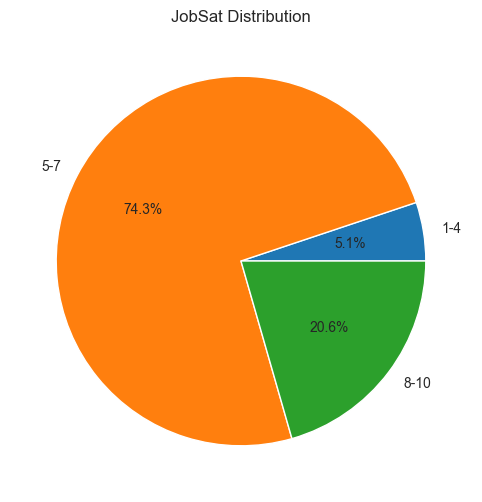

In [71]:
plt.figure(figsize=(10,6))
plt.pie(job_sat_counts, labels=job_sat_counts.index, autopct='%1.1f%%')
plt.title('JobSat Distribution')
plt.show()

# Programming Languages Analysis
LanguageHaveWorkedWith and LanguageWantToWorkWith.

In [73]:
df[['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']]

,LanguageHaveWorkedWith,LanguageWantToWorkWith
0,NaN,NaN
1,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2,C#,C#
3,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...
4,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python
...,...,...
65432,NaN,NaN
65433,NaN,NaN
65434,NaN,NaN
65435,C;C++;Go;Lua;Objective-C;Python;Rust;SQL,Rust;SQL


In [74]:
missing_val = df[['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']].isnull().sum()
missing_val

LanguageHaveWorkedWith    5692
LanguageWantToWorkWith    9685
dtype: int64

In [80]:
df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                          1002
Python                                                                   832
HTML/CSS;JavaScript;PHP;SQL                                              503
HTML/CSS;JavaScript                                                      452
C#                                                                       452
                                                                        ... 
Bash/Shell (all shells);Java;JavaScript;Python;Ruby;Scala;SQL              1
Bash/Shell (all shells);Go;Groovy;Haskell;Java;Python                      1
Bash/Shell (all shells);C#;C++;HTML/CSS;JavaScript;MATLAB;Python;SQL       1
Bash/Shell (all shells);JavaScript;Perl;Python;Ruby;TypeScript             1
C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript                           1
Name: count, Length: 23864, dtype: int64

In [81]:
df['LanguageWantToWorkWith'].value_counts()

LanguageWantToWorkWith
Python                                                                                                        922
Rust                                                                                                          737
HTML/CSS;JavaScript;TypeScript                                                                                632
C#                                                                                                            538
Go                                                                                                            460
                                                                                                             ... 
Dart;JavaScript;Kotlin;Python;Scala;SQL                                                                         1
Bash/Shell (all shells);Go;Groovy;Haskell;Python                                                                1
Bash/Shell (all shells);C#;C++;Lua;PowerShell;Python;R;Rust;SQL;T

# Make data frame form both column

In [88]:
from collections import Counter
def count_languages(column):
    all_lang = []
    for lang in df[column].dropna():
        all_lang.extend(lang.split(';'))
    return Counter(all_lang)

In [95]:
# Count all languages
worked_count = count_languages('LanguageHaveWorkedWith')
want_to_count = count_languages('LanguageWantToWorkWith')
# Convert to Datafarme
df_count = pd.DataFrame([worked_count, want_to_count]).T.fillna(0)
df_count.columns = ['Worked with', 'want To']

<Figure size 1800x600 with 0 Axes>

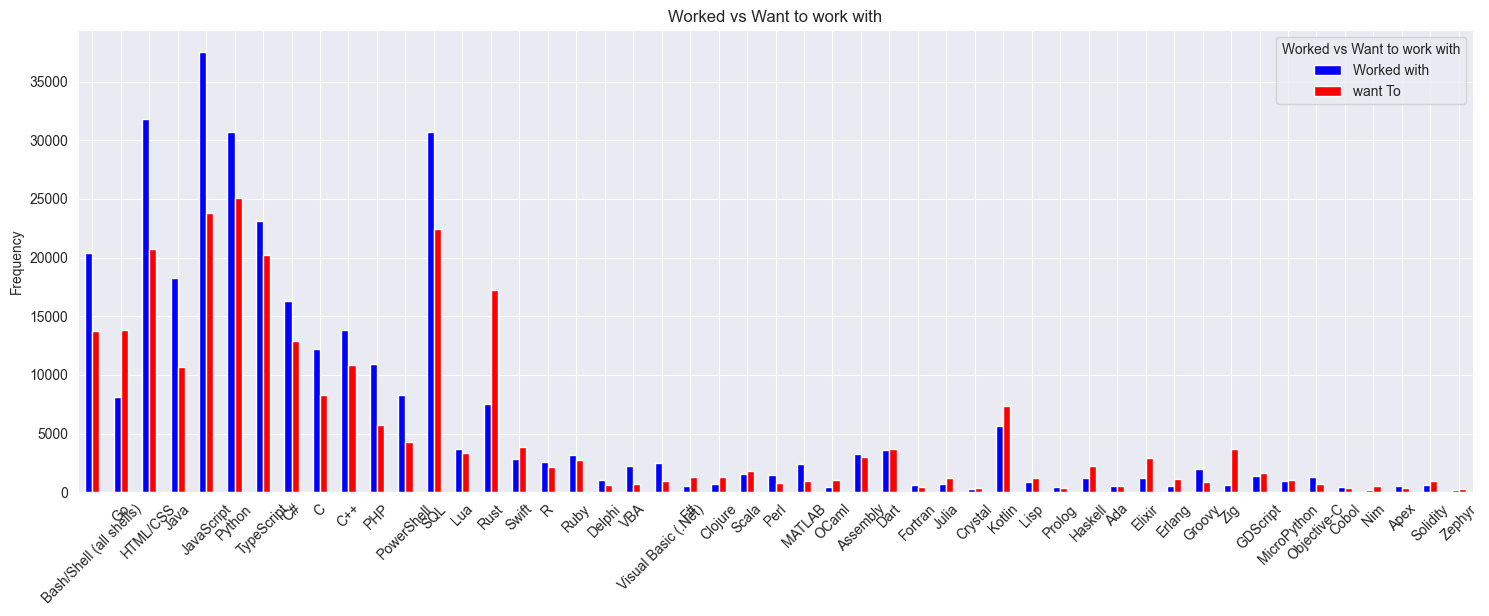

In [98]:
# SHOW BAR CHART
plt.figure(figsize=(18,6))
df_count.plot(kind='bar', figsize=(18,6), color=['blue', 'red'])
plt.title('Worked vs Want to work with')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Worked vs Want to work with')
plt.show()

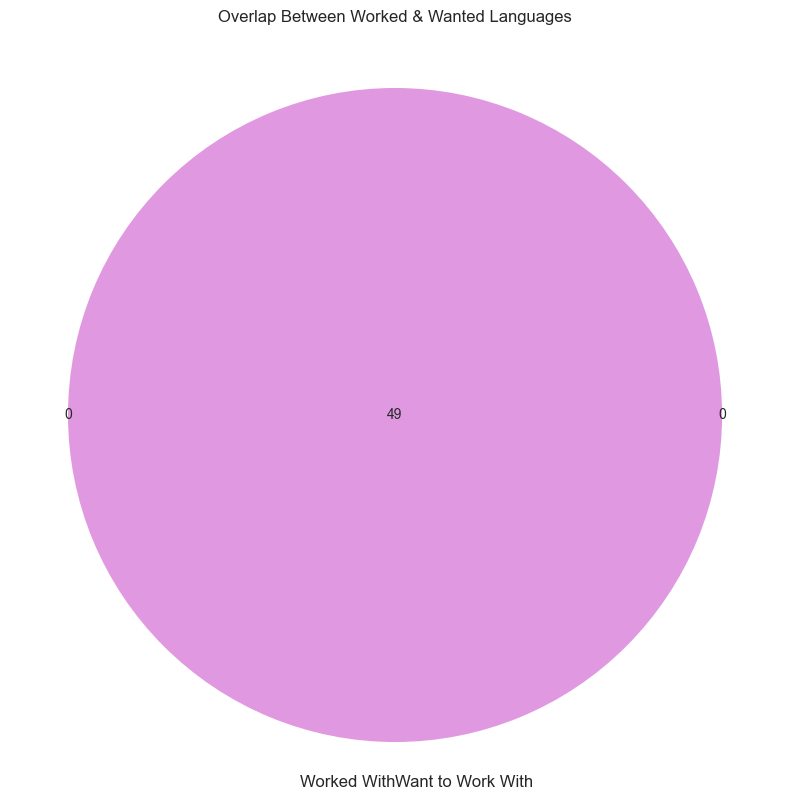

In [103]:
from matplotlib_venn import venn2
set_worked = set(worked_count.keys())
set_want_to = set(want_to_count.keys())
plt.figure(figsize=(10,10))
venn2([set_worked, set_want_to], set_labels=("Worked With", "Want to Work With"), set_colors=['red', 'blue'])
plt.title("Overlap Between Worked & Wanted Languages")
plt.show()